<a href="https://colab.research.google.com/github/KGF2/DeepLearningAmateur/blob/master/FMNIST_DQN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# 1) preprocess the data
# 2) build the nw
# 3) train the nw
# 4) analyse the results


In [0]:
import torch


In [0]:
import torchvision 
import torchvision.transforms as transforms

# extract raw data and convert to tensor
train_set = torchvision.datasets.FashionMNIST(
    root = './data'
    ,train = True
    ,download = True
    ,transform = transforms.Compose([transforms.ToTensor()])
)


In [0]:
import torch.nn as nn
import torch.nn.functional as F

# DQN

class DQNetwork (nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
    self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
    self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
    self.fc2 = nn.Linear(in_features=120, out_features=60)
    self.out = nn.Linear(in_features=60, out_features=10)
  def forward(self, tnsr):
    tnsr = F.relu(self.conv1(tnsr))
    tnsr = F.max_pool2d(tnsr, kernel_size=2, stride=2)
    tnsr = F.relu(self.conv2(tnsr))
    tnsr = F.max_pool2d(tnsr, kernel_size=2, stride=2)
    tnsr = tnsr.reshape([-1, 12*4*4])
    tnsr = F.relu(self.fc1(tnsr))
    tnsr = F.relu(self.fc2(tnsr))
    tnsr = self.out(tnsr)
    return tnsr

In [4]:
import torch.optim as optim

# Batch Training

DQN = DQNetwork()

train_loader = torch.utils.data.DataLoader(dataset=train_set, batch_size=100, shuffle=False)
optimiser = optim.Adagrad(DQN.parameters(), lr=0.01)

def get_num_correct(pred, labels):
  return pred.argmax(dim=1).eq(labels).sum().item()

for epoch in range(3):
  total_loss = 0
  total_correct = 0
  for batch in train_loader:
    images, labels = batch
    pred = DQN(images)
    loss = F.cross_entropy(pred, labels)
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()
    total_loss += loss.item()
    total_correct += get_num_correct(pred, labels)
  print ("epoch : " + str(epoch+1) +"\t"+ "total_entropy_loss : " + str(total_loss) +"\t\t"+ "total_correct_predictions : " + str(total_correct))

epoch : 1	total_entropy_loss : 404.69355511665344		total_correct_predictions : 44411
epoch : 2	total_entropy_loss : 297.15817818045616		total_correct_predictions : 48864
epoch : 3	total_entropy_loss : 268.4797993302345		total_correct_predictions : 50231


In [5]:
# 4) Analyse the result

"""import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

cm = confusion_matrix(train_set.targets, train_)"""

'import matplotlib.pyplot as plt\n\nfrom sklearn.metrics import confusion_matrix\nfrom sklearn.metrics import plot_confusion_matrix\n\ncm = confusion_matrix(train_set.targets, train_)'

In [6]:
# MNIST dataset

"""
import torchvision 
import torchvision.transforms as transforms

train_set_mnist = torchvision.datasets.MNIST(
    root = './data'
    ,train = True
    ,download = True
    ,transform = transforms.Compose([transforms.ToTensor()])
)

train_loader_mnist = torchvision.utils.datasets 
"""

"\nimport torchvision \nimport torchvision.transforms as transforms\n\ntrain_set_mnist = torchvision.datasets.MNIST(\n    root = './data'\n    ,train = True\n    ,download = True\n    ,transform = transforms.Compose([transforms.ToTensor()])\n)\n\ntrain_loader_mnist = torchvision.utils.datasets \n"

In [7]:
# 4) Prediction result analysis

# confusion matrix -- 1st type

@torch.no_grad()
def get_all_preds(model, data_loader):
    all_preds = torch.tensor([])
    for batch in data_loader:
        images, labels = batch

        preds = model(images)
        all_preds = torch.cat(
            (all_preds, preds)
            ,dim=0
        )
    return all_preds

with torch.no_grad():
    prediction_loader = torch.utils.data.DataLoader(train_set, batch_size=10000)
    train_preds = get_all_preds(DQN, prediction_loader)

preds_correct = get_num_correct(train_preds, train_set.targets)

print('total correct:', preds_correct)
print('accuracy:', preds_correct / len(train_set))


total correct: 50694
accuracy: 0.8449


In [8]:
stacked = torch.stack(
    (
        train_set.targets
        ,train_preds.argmax(dim=1)
    )
    ,dim=1
)
print(stacked.shape)
print(stacked)
stacked[0].tolist()

cmt = torch.zeros(10,10, dtype=torch.int64)
cmt

torch.Size([60000, 2])
tensor([[9, 9],
        [0, 0],
        [0, 3],
        ...,
        [3, 3],
        [0, 0],
        [5, 5]])


tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [9]:
for p in stacked:
    tl, pl = p.tolist()
    cmt[tl, pl] = cmt[tl, pl] + 1
cmt

tensor([[5164,    7,  141,  351,   26,    7,  230,    0,   74,    0],
        [   8, 5711,    9,  219,   19,    2,   27,    0,    5,    0],
        [  64,    0, 4698,   58,  740,    3,  369,    0,   68,    0],
        [ 235,   14,   51, 5412,  149,    2,  120,    0,   17,    0],
        [  14,    9,  797,  328, 4484,    2,  325,    0,   41,    0],
        [   1,    0,    0,    4,    0, 5600,    1,  295,   24,   75],
        [1468,   13, 1018,  235,  662,    3, 2506,    0,   94,    1],
        [   0,    0,    0,    0,    0,  107,    0, 5722,   10,  161],
        [  15,    6,   55,   35,   23,   30,   59,   14, 5758,    5],
        [   0,    0,    0,    2,    2,   49,    0,  304,    4, 5639]])

In [10]:
# Built-in confusion matrix -- 2nd type

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
cm = confusion_matrix(train_set.targets, train_preds.argmax(dim=1))
print(type(cm))
cm

<class 'numpy.ndarray'>


array([[5164,    7,  141,  351,   26,    7,  230,    0,   74,    0],
       [   8, 5711,    9,  219,   19,    2,   27,    0,    5,    0],
       [  64,    0, 4698,   58,  740,    3,  369,    0,   68,    0],
       [ 235,   14,   51, 5412,  149,    2,  120,    0,   17,    0],
       [  14,    9,  797,  328, 4484,    2,  325,    0,   41,    0],
       [   1,    0,    0,    4,    0, 5600,    1,  295,   24,   75],
       [1468,   13, 1018,  235,  662,    3, 2506,    0,   94,    1],
       [   0,    0,    0,    0,    0,  107,    0, 5722,   10,  161],
       [  15,    6,   55,   35,   23,   30,   59,   14, 5758,    5],
       [   0,    0,    0,    2,    2,   49,    0,  304,    4, 5639]])

Confusion matrix, without normalization
[[5164    7  141  351   26    7  230    0   74    0]
 [   8 5711    9  219   19    2   27    0    5    0]
 [  64    0 4698   58  740    3  369    0   68    0]
 [ 235   14   51 5412  149    2  120    0   17    0]
 [  14    9  797  328 4484    2  325    0   41    0]
 [   1    0    0    4    0 5600    1  295   24   75]
 [1468   13 1018  235  662    3 2506    0   94    1]
 [   0    0    0    0    0  107    0 5722   10  161]
 [  15    6   55   35   23   30   59   14 5758    5]
 [   0    0    0    2    2   49    0  304    4 5639]]


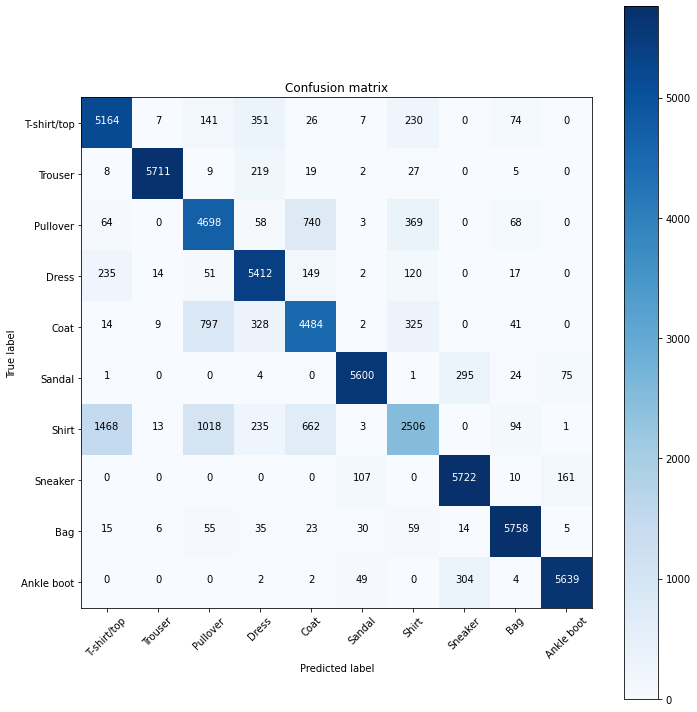

In [11]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

names = (
    'T-shirt/top'
    ,'Trouser'
    ,'Pullover'
    ,'Dress'
    ,'Coat'
    ,'Sandal'
    ,'Shirt'
    ,'Sneaker'
    ,'Bag'
    ,'Ankle boot'
)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm, names)